# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

In [ ]:
NAME = "Piotr Cięgotura, Wojciech Sutowicz, Brunon Kania, Filip Magnowski"
COLLABORATORS = ""

---

## Zestaw zadań 8: Analiza danych przestrzennych z wykorzystaniem pakietów GeoPandas i PySAL (część 2)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import libpysal as ps
import pointpats as pp

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

In [2]:
# Miejsce do wklejenie funkcji ze wcześniejszych zestawów zadań
# YOUR CODE HERE
#raise NotImplementedError()
def g_function_poisson(d, intensity):
    """
    Parameters
    -------
    d: array
        Macierz zawierająca odległości, dla których ma zostać wyznaczona wartość funkcji G.
    intensity: float
        Liczba dodatnia określająca intensywność jednorodnego procesu Poissona.
    
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """  
    # YOUR CODE HERE
    #raise NotImplementedError()
    G=0
    for i in range(0,len(d)):
        G = np.append(G, (1-2.71828182845904**(-intensity*3.141592653589793*(d[i])**2)))
    
    G = np.delete(G,0)
    
    df=pd.DataFrame()
    df['D']=d
    df['G']=G
           
    return df
def f_function_poisson(d, intensity):
    """
    Parameters
    -------
    d: array
        Macierz zawierająca odległości, dla których ma zostać wyznaczona wartość funkcji F.
    intensity: float
        Liczba dodatnia określająca intensywność jednorodnego procesu Poissona.

    Returns
    -------
    f: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji F,
        - "F" - zawierającą wyliczone wartości funkcji F.
    """  
    # YOUR CODE HERE
    #raise NotImplementedError()
  
    G=0
    for i in range(0,len(d)):
        G = np.append(G, (1-2.71828182845904**(-intensity*3.141592653589793*(d[i])**2)))
    
    G = np.delete(G,0)
    
    df=pd.DataFrame()
    df['D']=d
    df['F']=G
           
    return df

#### UWAGA!
Znaczna część przykładów i dokumentacji modułów wchodzących w skład pakietu pysal dostępna w internecie nie dotyczny ich najnowszych wersji.
Z tego powodu wygodniejszym sposobem zdobywania informacji na temat wykorzystywanych modułów, klas i funkcji jest wykorzystanie funkcji help(), np.: help(ps), help(pp), help(pp.pointpattern).

### Zadanie 1: Import i przygotowanie danych (5 pkt)
Wykorzystując funkcję `geopandas.read_file()` zaimportuj do notatnika dane z dołączonych do niego plików (zakres importowanych danych i odwzorowanie kartograficzne nie wymagają zmian). Następnie, wykorzystując funkcję `geopandas.GeoDataFrame.dissolve()` przygotuj tablicę zawierającą geometrię granic całego kraju. Dostosuj informację znajdującą się w kolumnie "Nazwa" stworzonej tablicy do informacji w niej zawartej.

                             Nazwa  \
0    powiat ropczycko-sędziszowski   
1                   powiat łosicki   
2              powiat piaseczyński   
3                  powiat radomski   
4                 powiat sierpecki   
..                             ...   
375             powiat nowodworski   
376                powiat jaworski   
377               powiat węgrowski   
378             powiat wejherowski   
379              powiat staszowski   

                                              geometry  
0    POLYGON ((692305.365 260282.248, 692313.646 26...  
1    POLYGON ((753920.175 497017.076, 753918.822 49...  
2    POLYGON ((644442.384 473992.041, 644345.678 47...  
3    POLYGON ((638056.482 404421.246, 638059.412 40...  
4    POLYGON ((534236.749 555932.727, 534235.027 55...  
..                                                 ...  
375  POLYGON ((521445.985 722541.335, 521523.278 72...  
376  POLYGON ((303544.254 353195.337, 303547.016 35...  
377  POLYGON ((702854.223 5325

C:\Users\Ja\AppData\Local\Temp\ipykernel_21080\1409302857.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  granice["Nazwa"][0]="Polska"


                                            geometry   Nazwa
0  POLYGON ((314574.250 311049.909, 314544.080 31...  Polska


<AxesSubplot: >

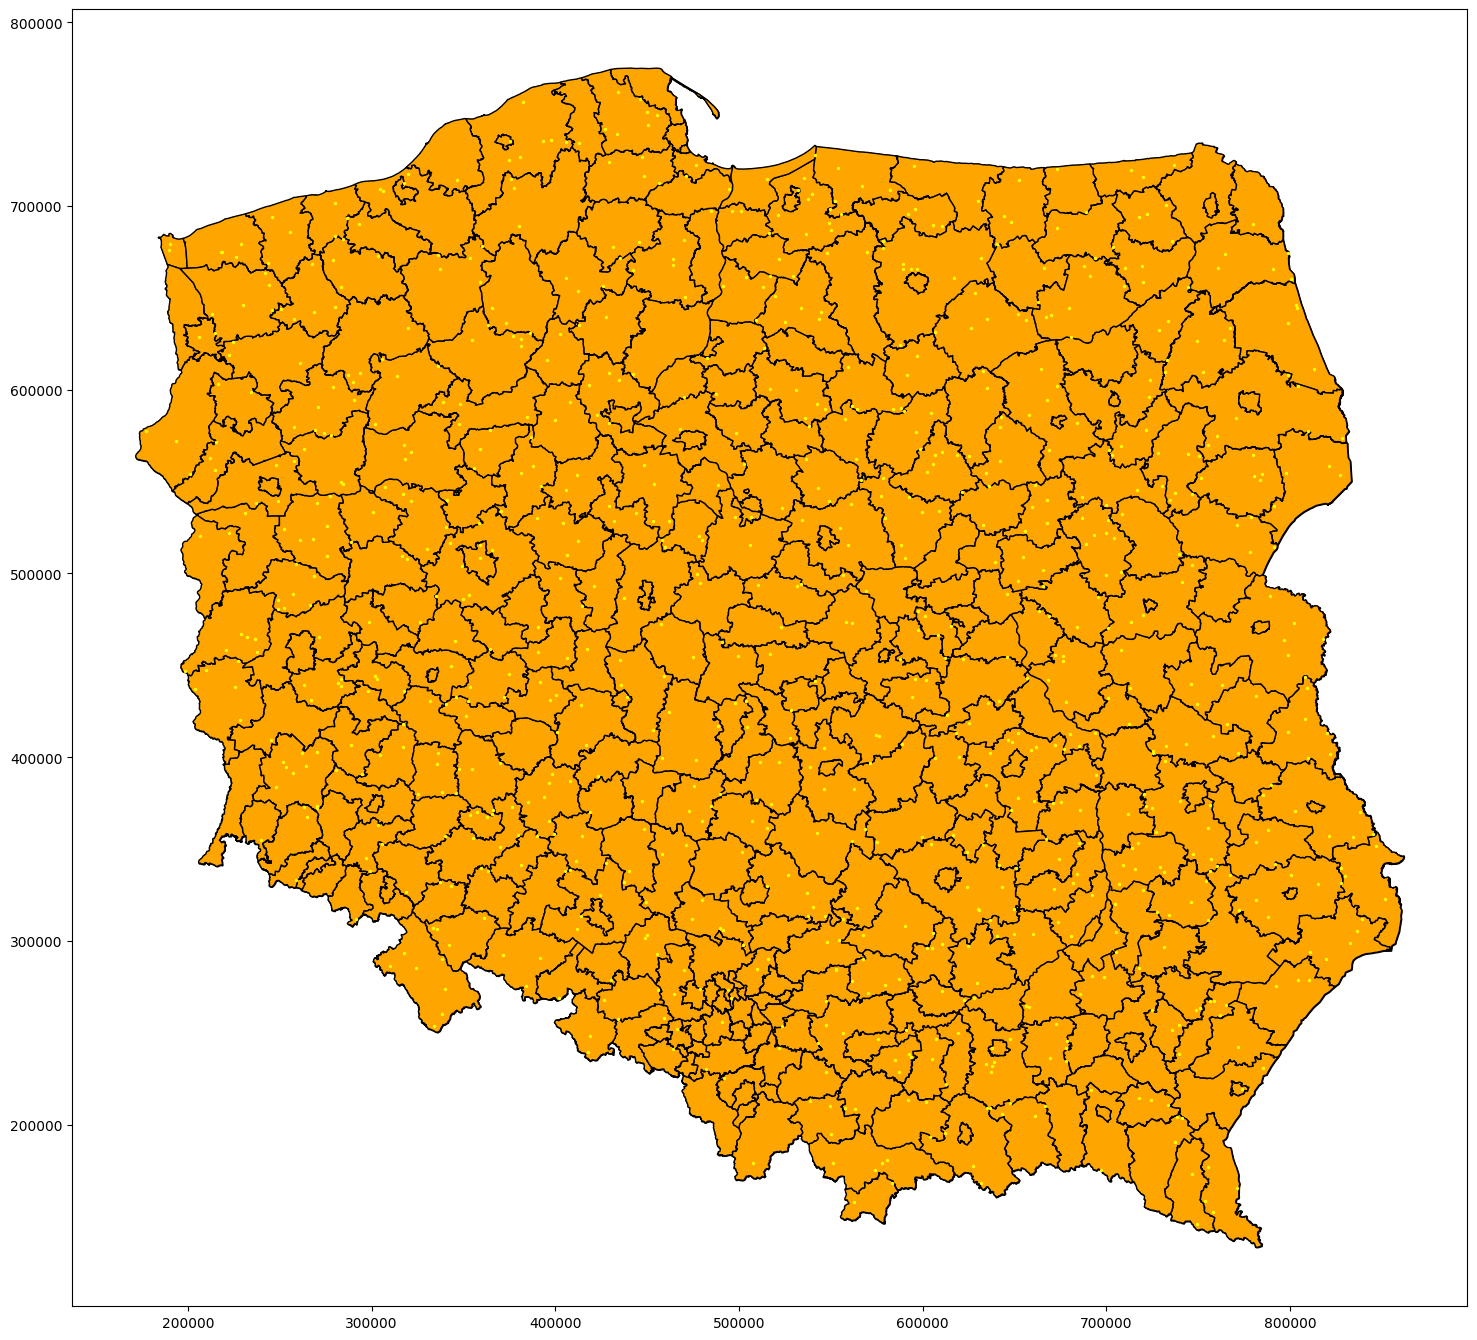

In [3]:
# YOUR CODE HERE
#raise NotImplementedError()
points_1 = gpd.read_file("points_1.zip")
points_2 = gpd.read_file("points_2.zip")
points_3 = gpd.read_file("points_3.zip")
points_4 = gpd.read_file("points_4.zip")
points_5 = gpd.read_file("points_5.zip")
Powiaty = gpd.read_file("Powiaty.zip")
print(Powiaty)
granice = Powiaty.dissolve()
granice["Nazwa"][0]="Polska"
print(granice)
ax1 = granice.plot(color = "green", figsize = [18,20], edgecolor='black')
Powiaty.plot(ax = ax1, color = "orange", edgecolor='black')
points_1.plot(ax = ax1, color = "yellow", markersize = 2)

### Zadanie 2: Badanie intensywności procesów punktowych metodą szacowania lokalnego  (15 pkt)

Przygotuj funkcję `point_count_on_subregions()`, która będzie zliczać punkty w obrębie podobszarów oraz funkcję `intensity_on_subregions()`, która będzie obliczać intensywność procesu punktowego w obrębie podobszarów.

Następnie wykorzystaj przygotowane funkcje do zbadania intensywności rozkładów punktów z plików points_1.zip i points_2.zip na obszarze poszczegolnych powiatów.

Przedstaw wyniki analizy graficznie w postaci kartogramów z nałożonymi na nie rozkładami punktów. Zestaw wyniki na pojedynczej figurze (siatka wykresów 1x2).

Przydatne klasy, funkcje i własności:
- `geopandas.GeoSeries.within()`
- `geopandas.GeoSeries.area`

#### a) Przygotowanie funkcji

In [3]:
def point_count_on_subregions(points, subregions):
    """
    Parameters
    -------
    points: GeoSeries 
        Tablica zawierająca punkty zapisane jako obiekty shapely.geometry.point.Point.
    subregions: GeoDataFrame
        Tablica zawierająca geometrie podobszarów zapisane jako obiekty shapely.geometry.polygon.Polygon.
    Returns
    -------
    counts: Series
        Seria Pandas zawierająca liczbą punktów przypisanych do każdego z podobszarów.
    """
    # YOUR CODE HERE
    #raise NotImplementedError()
    # points - punkty z rozkladow
    # subregions - to powiaty gdzie trzeba zliczyc punkty
   # points = gpd.GeoDataFrame(geometry=gpd.GeoSeries(points))
   # d=0
   # for j in range(0,len(subregions)):
   #     points['Jest_punkt'] = points.within(subregions[j])
   #     d_tmp=0
   #     for i in range(0,len(points)):
#             if points['Jest_punkt'][i]==True:
#                 d_tmp+=1
                
#         d=np.append(d,d_tmp)
#     d=np.delete(d,0) #ilosc punktow w kazdym powiecie 
    #counts = {"Liczba_punktow": d, "geometry": subregions}
    #counts = pd.Series(counts)
    d=[]
    for index,row in subregions.iterrows():
        polygon=row['geometry']
        x=points.within(polygon)
        d.append(np.sum(x))
    counts=pd.Series(d)
    return counts #ilosc punktow w powiatach, 
def intensity_on_subregions(points, subregions):
    """
    Parameters
    -------
    points: GeoSeries
        Tablica zawierająca punkty zapisane jako obiekty shapely.geometry.point.Point.
    subregions: GeoDataFrame
        Tablica zawierająca geometrie podobszarów zapisane jako obiekty shapely.geometry.polygon.Polygon.
    Returns
    -------
    intensity: Series
        Seria Pandas zawierająca intensywność przypisaną do każdego z podobszarów.
    """
    # YOUR CODE HERE
    #raise NotImplementedError()
    d=point_count_on_subregions(points,subregions)#tu mam wyliczona ilosc punktow w obszarze
    #subregions = gpd.GeoDataFrame(geometry=gpd.GeoSeries(subregions))
    #subregions['intensywnosc'] = d[0]/(subregions.area/10**6)
    #intensity = {"Intensywnosc": subregions['intensywnosc'], "geometry": subregions}
    #intensity = pd.Series(intensity)
    
    intensity = d/subregions.area
    
    return intensity

#### b) Wygenerowanie danych

In [4]:
# YOUR CODE HERE
#raise NotImplementedError()

Powiaty['intensywnosc_1']=intensity_on_subregions(points_1['geometry'],Powiaty)
Powiaty['intensywnosc_2']=intensity_on_subregions(points_2['geometry'],Powiaty)

Powiaty



,Nazwa,geometry,intensywnosc_1,intensywnosc_2
0,powiat ropczycko-sędziszowski,"POLYGON ((692305.365 260282.248, 692313.646 26...",1.824740e-09,0.000000e+00
1,powiat łosicki,"POLYGON ((753920.175 497017.076, 753918.822 49...",0.000000e+00,0.000000e+00
2,powiat piaseczyński,"POLYGON ((644442.384 473992.041, 644345.678 47...",1.611810e-09,9.670861e-09
3,powiat radomski,"POLYGON ((638056.482 404421.246, 638059.412 40...",6.542425e-09,6.542425e-10
4,powiat sierpecki,"POLYGON ((534236.749 555932.727, 534235.027 55...",4.700975e-09,3.525731e-09
...,...,...,...,...
375,powiat nowodworski,"POLYGON ((521445.985 722541.335, 521523.278 72...",2.971687e-09,0.000000e+00
376,powiat jaworski,"POLYGON ((303544.254 353195.337, 303547.016 35...",5.164896e-09,3.443264e-09
377,powiat węgrowski,"POLYGON ((702854.223 532567.782, 702853.911 53...",6.560269e-09,8.200337e-10
378,powiat wejherowski,"POLYGON ((430377.866 773965.783, 430351.853 77...",5.443972e-09,0.000000e+00


#### c) Wizualizacja

<AxesSubplot: >

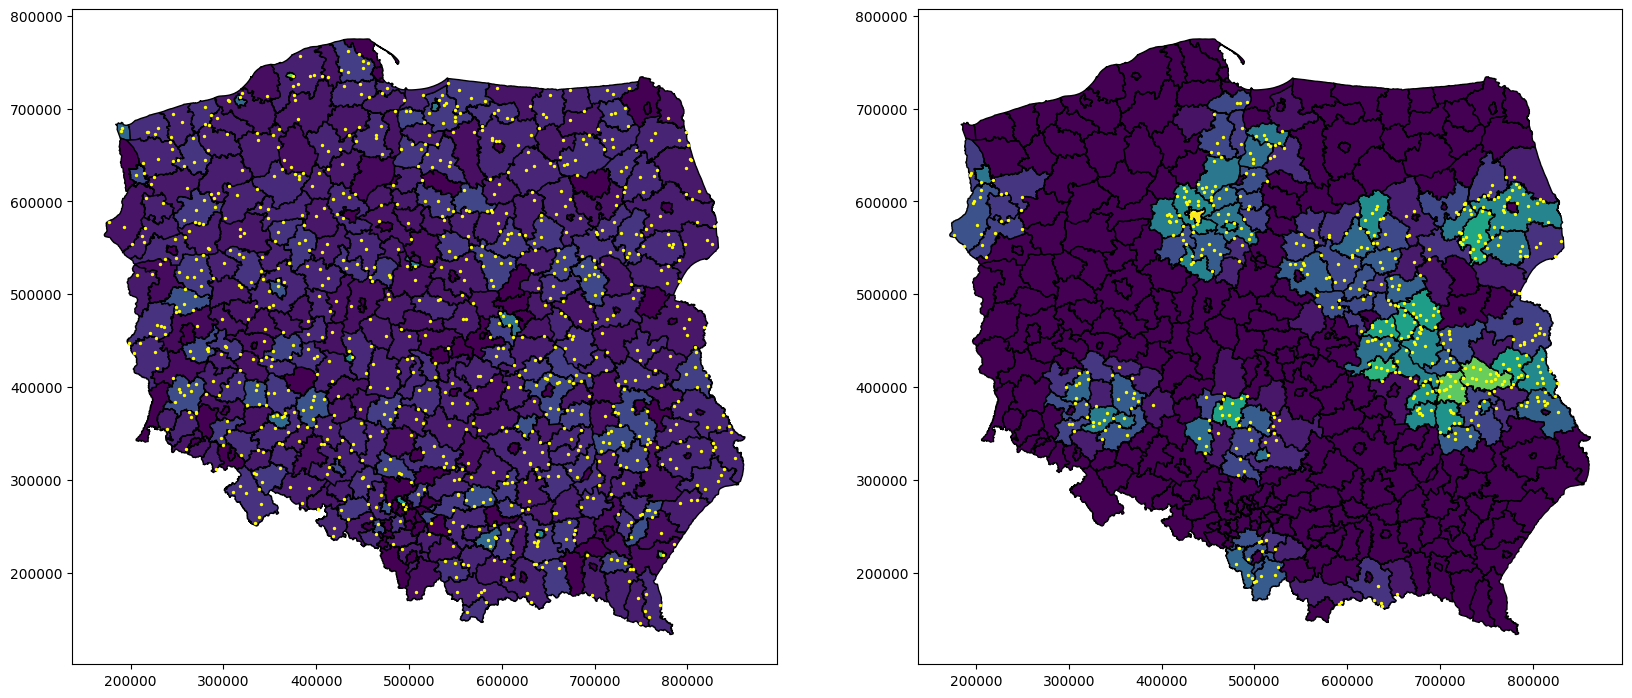

In [5]:
# YOUR CODE HERE
#raise NotImplementedError()
#print(d[1][0])
figs,axes = plt.subplots(1,2, figsize=(20,20))
#naluz rozklady punktow
Powiaty.plot(column = 'intensywnosc_1', figsize = [18,20], edgecolor='black',ax=axes[0])
Powiaty.plot(column = 'intensywnosc_2', figsize = [18,20], edgecolor='black',ax=axes[1])
points_1.plot(color = "yellow", markersize = 2,ax=axes[0])
points_2.plot(color = "yellow", markersize = 2,ax=axes[1])

### Zadanie 3: Funkcja G (15 pkt)
Wykorzystując funkcję `pointpats.distance_statistics.g()` przygotuj funkcję `g_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji G analizowanego rozkładu punktów.

Następnie wykorzystaj przygotowane funkcje do wygnenerowania danych dla rozkładów punktów z plików points_3.zip, points_4.zip i points_5.zip. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji G przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją G jednorodnego rozkładu Poissona o odpowiednio dobranej intensywności. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy funkcji G w dolnym wierszu figury. 

#### a) Przygotowanie funkcji

In [5]:
def g_function(points, intervals):
    """
    Parameters
    -------
    points: GeoSeries
        Tablica zawierająca punkty zapisane jako obiekty shapely.geometry.point.Point.
    intervals: int
        Liczba dodatnia określająca na ile części ma zostać podzielony dystans do najdalszej odległosci do najbliższego sąsiada.
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """
    # YOUR CODE HERE
    #raise NotImplementedError()
    #d=pp.distance_statistics.g(points['geometry'])
    punkty=np.array([[e.x, e.y] for e in points['geometry']])
    
    gp1 = pp.distance_statistics.g(punkty,intervals) #distances dziala distances=intervals
    
    g=pd.DataFrame()   #pierwsza ramka danych zawierająca wyniki klasteryzacji 
    g['D']=gp1[0]
    g['G']=gp1[1]
    
    
    
    
    return g

#### b) Wygenerowanie danych

In [120]:
# YOUR CODE HERE
#raise NotImplementedError()

#p3 = pp.distance_statistics.g(points_3,10)
p3=g_function(points_3,10)
p4=g_function(points_4,10)
p5=g_function(points_5,10)


intensywnosc3=len(points_3)/granice.area
intensywnosc4=len(points_4)/granice.area
intensywnosc5=len(points_5)/granice.area


    
G_hp3=g_function_poisson(p3['D'],intensywnosc3)
G_hp4=g_function_poisson(p4['D'],intensywnosc4)
G_hp5=g_function_poisson(p5['D'],intensywnosc5)


#### c) Wizualizacja

Text(769.1928104575164, 0.5, 'G')

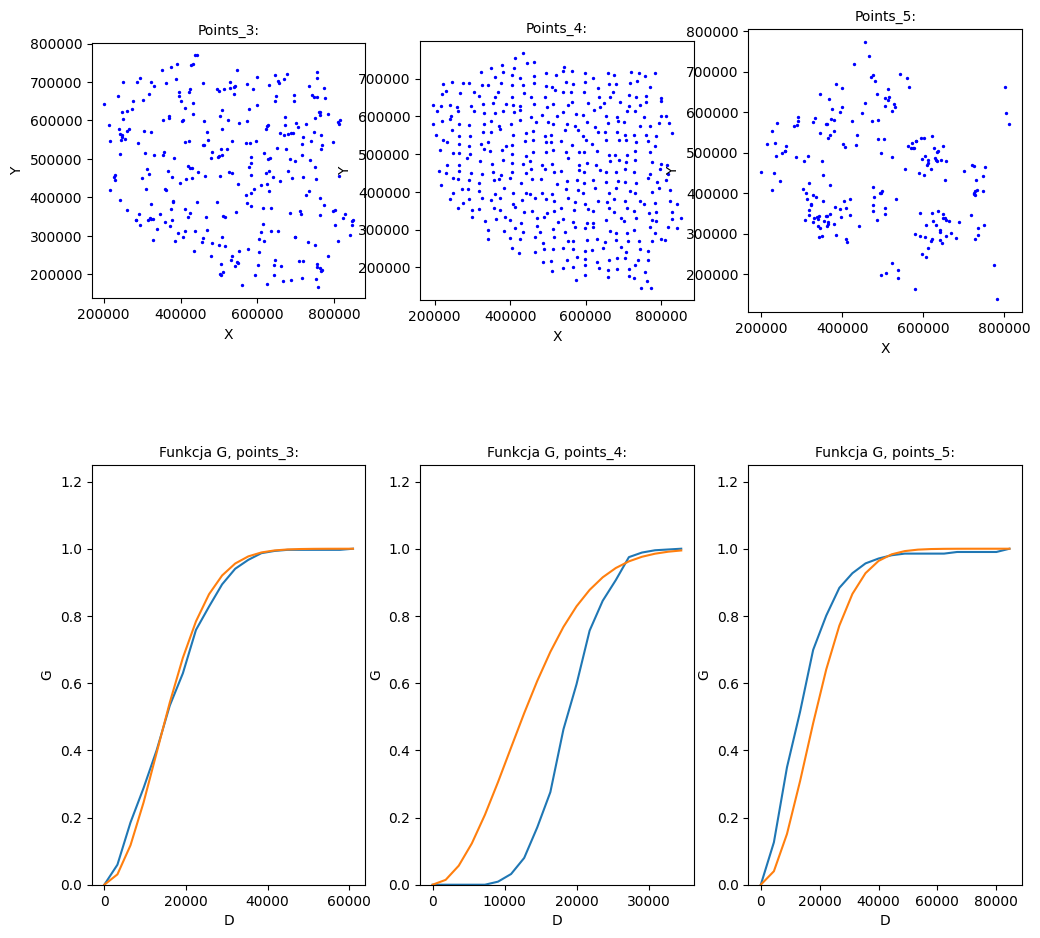

In [121]:
# YOUR CODE HERE
#raise NotImplementedError()
#print(gp1)
#help(pp.distance_statistics)
fig, ax = plt.subplots(2,3,figsize=(12,12))

#help(pp.distance_statistics)
points_3.plot(ax = ax[0,0], color = "blue", markersize = 2)
points_4.plot(ax = ax[0,1], color = "blue", markersize = 2)
points_5.plot(ax = ax[0,2], color = "blue", markersize = 2)
ax[0,0].set_title("Points_3:",size = 10)
ax[0,0].set_aspect('equal')
ax[0,0].set_xlabel("X")
ax[0,0].set_ylabel("Y")

ax[0,1].set_title("Points_4:",size = 10)
ax[0,1].set_aspect('equal')
ax[0,1].set_xlabel("X")
ax[0,1].set_ylabel("Y")

ax[0,2].set_title("Points_5:",size = 10)
ax[0, 2].set_aspect('equal')
ax[0, 2].set_xlabel("X")
ax[0, 2].set_ylabel("Y")


ax[1,0].plot(p3['D'],p3['G'])
ax[1,0].plot(G_hp3['D'],G_hp3['G'])
ax[1,0].set_ylim(0, 1.25)
ax[1,0].set_title("Funkcja G, points_3:",size = 10)
ax[1,0].set_xlabel("D")
ax[1,0].set_ylabel("G")

ax[1,1].plot(p4['D'],p4['G'])
ax[1,1].plot(G_hp4['D'],G_hp4['G'])
ax[1,1].set_ylim(0, 1.25)
ax[1,1].set_title("Funkcja G, points_4:",size = 10)
ax[1,1].set_xlabel("D")
ax[1,1].set_ylabel("G")

ax[1,2].plot(p5['D'],p5['G'])
ax[1,2].plot(G_hp5['D'],G_hp5['G'])
ax[1,2].set_ylim(0, 1.25)
ax[1,2].set_title("Funkcja G, points_5:",size = 10)
ax[1,2].set_xlabel("D")
ax[1,2].set_ylabel("G")

### Zadanie 4: Funkcja F (15 pkt)

Wykorzystując funkcję `pointpats.distance_statistics.f()` przygotuj funkcję `f_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji F analizowanego rozkładu punktów.

Następnie wykorzystaj przygotowane funkcje do wygnenerowania danych dla rozkładów punktów z plików points_3.zip, points_4.zip i points_5.zip. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji F przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją F jednorodnego rozkładu Poissona o odpowiednio dobranej intensywności. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy funkcji F w dolnym wierszu figury. 

#### a) Przygotowanie funkcji

In [12]:
def f_function(points, intervals, polygon):
    """
    Parameters
    -------
    points: GeoSeries
        Tablica zawierająca punkty zapisane jako obiekty shapely.geometry.point.Point.
    intervals: int
        Liczba dodatnia określająca na ile części ma zostać podzielony dystans do najdalszej odległosci do najbliższego sąsiada.
    polygon: Polygon
        Obszar, na którym mają zostać wygenerowane punkty procesu testowego.
        
    Returns
    -------
    f: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji F,
        - "F" - zawierającą wyliczone wartości funkcji F.
    """
    # YOUR CODE HERE
   

    #raise NotImplementedError()
    punkty=np.array([[e.x, e.y] for e in points['geometry']])
    g=pp.distance_statistics.f(coordinates=punkty,support=intervals,hull=polygon['geometry'][0])
    
    f=pd.DataFrame()   #pierwsza ramka danych zawierająca wyniki klasteryzacji 
    f['D']=g[0]
    f['F']=g[1]
    
    
    
    
    return f
    

#### b) Wygenerowanie danych

In [13]:
# YOUR CODE HERE
#raise NotImplementedError()
pf3=f_function(points_3,10,granice)
pf4=f_function(points_4,10,granice)
pf5=f_function(points_5,10,granice)

intensywnosc3=len(points_3)/granice.area
intensywnosc4=len(points_4)/granice.area
intensywnosc5=len(points_5)/granice.area

F_pf3=f_function_poisson(pf3['D'],intensywnosc3)
F_pf4=f_function_poisson(pf4['D'],intensywnosc4)
F_pf5=f_function_poisson(pf5['D'],intensywnosc5)

#### c) Wizualizacja

Text(769.1928104575164, 0.5, 'F')

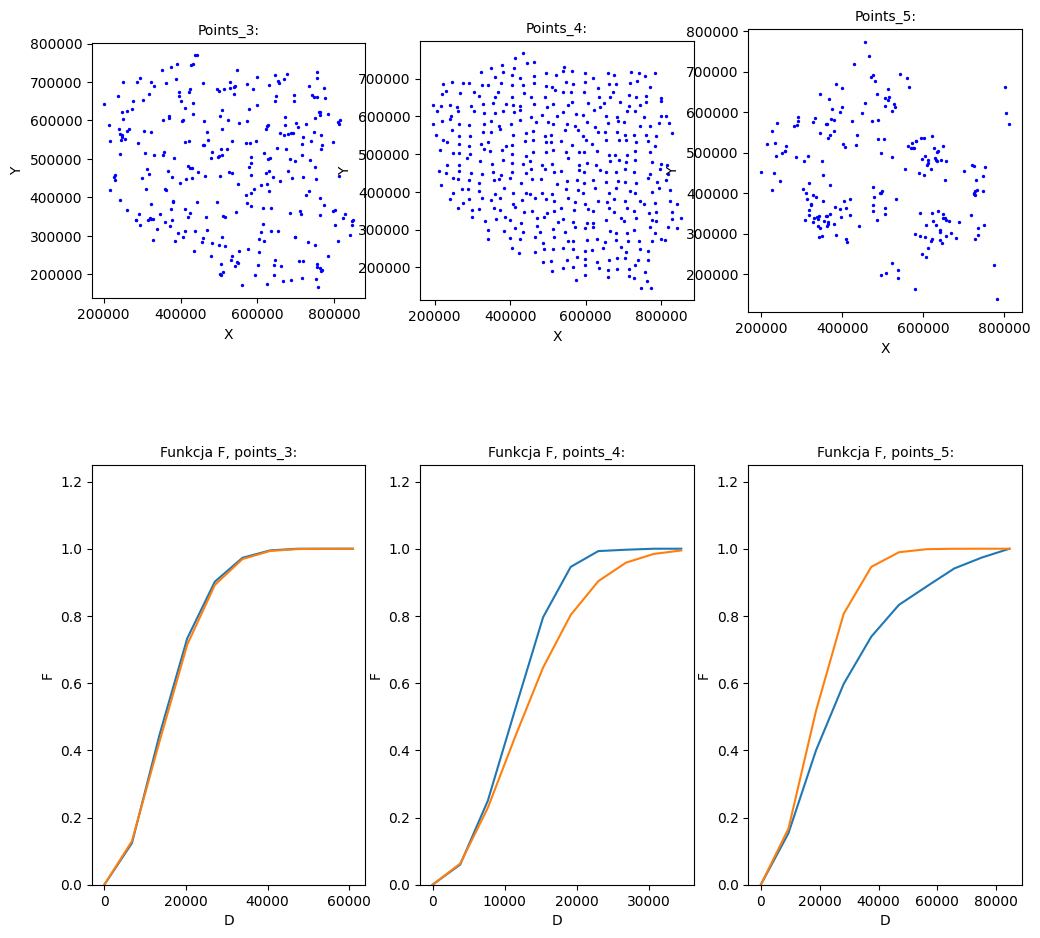

In [15]:
# YOUR CODE HERE
#raise NotImplementedError()
fig, ax = plt.subplots(2,3,figsize=(12,12))

#help(pp.distance_statistics)
points_3.plot(ax = ax[0,0], color = "blue", markersize = 2)
points_4.plot(ax = ax[0,1], color = "blue", markersize = 2)
points_5.plot(ax = ax[0,2], color = "blue", markersize = 2)
ax[0,0].set_title("Points_3:",size = 10)
ax[0,0].set_aspect('equal')
ax[0,0].set_xlabel("X")
ax[0,0].set_ylabel("Y")

ax[0,1].set_title("Points_4:",size = 10)
ax[0,1].set_aspect('equal')
ax[0,1].set_xlabel("X")
ax[0,1].set_ylabel("Y")

ax[0,2].set_title("Points_5:",size = 10)
ax[0, 2].set_aspect('equal')
ax[0, 2].set_xlabel("X")
ax[0, 2].set_ylabel("Y")


ax[1,0].plot(pf3['D'],pf3['F'])
ax[1,0].plot(F_pf3['D'],F_pf3['F'])
ax[1,0].set_ylim(0, 1.25)
ax[1,0].set_title("Funkcja F, points_3:",size = 10)
ax[1,0].set_xlabel("D")
ax[1,0].set_ylabel("F")

ax[1,1].plot(pf4['D'],pf4['F'])
ax[1,1].plot(F_pf4['D'],F_pf4['F'])
ax[1,1].set_ylim(0, 1.25)
ax[1,1].set_title("Funkcja F, points_4:",size = 10)
ax[1,1].set_xlabel("D")
ax[1,1].set_ylabel("F")

ax[1,2].plot(pf5['D'],pf5['F'])
ax[1,2].plot(F_pf5['D'],F_pf5['F'])
ax[1,2].set_ylim(0, 1.25)
ax[1,2].set_title("Funkcja F, points_5:",size = 10)
ax[1,2].set_xlabel("D")
ax[1,2].set_ylabel("F")
